### Cats vs Dogs(without augmentation)
// Code by Om

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
from io import BytesIO
import opendatasets as od

# Interactive widgets
from ipywidgets import widgets

In [27]:
# Import the data
base_dir = os.path.join(os.getcwd(), "Data/cats_dogs")
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#### Data pre-processing

    1. Create tf.data.dataset
    2. Apply various data pipeline functions on the data

In [38]:
# Create tf.data.dataset
training_dataset = tf.keras.utils.image_dataset_from_directory(directory=train_dir, 
                                                               batch_size=20, 
                                                               image_size=(150, 150), 
                                                               label_mode='binary')

validation_dataset = tf.keras.utils.image_dataset_from_directory(directory=validation_dir, 
                                                           batch_size=20, 
                                                           image_size=(150,150), 
                                                           label_mode='binary')

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [40]:
# Apply data pre-processing functions
training_dataset_final = training_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
validation_dataset_final = validation_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

#### Create and compile a CNN

In [41]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#### Train the CNN model

In [43]:
history = model.fit(training_dataset_final, epochs=15, validation_data=validation_dataset_final)

Epoch 1/15


2025-06-19 17:03:30.922349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.4511 - loss: 1.3852 - val_accuracy: 0.5000 - val_loss: 0.8030
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5634 - loss: 0.6957 - val_accuracy: 0.5110 - val_loss: 0.7422
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6615 - loss: 0.6413 - val_accuracy: 0.6810 - val_loss: 0.5912
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7057 - loss: 0.5741 - val_accuracy: 0.6810 - val_loss: 0.5917
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7244 - loss: 0.5445 - val_accuracy: 0.7070 - val_loss: 0.6044
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7420 - loss: 0.5193 - val_accuracy: 0.7100 - val_loss: 0.5709
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7636 - loss: 0.4999 - val_accuracy: 0.6630 - val_loss: 0.7259
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7222 - loss: 0.5911 - val_accuracy: 0.588

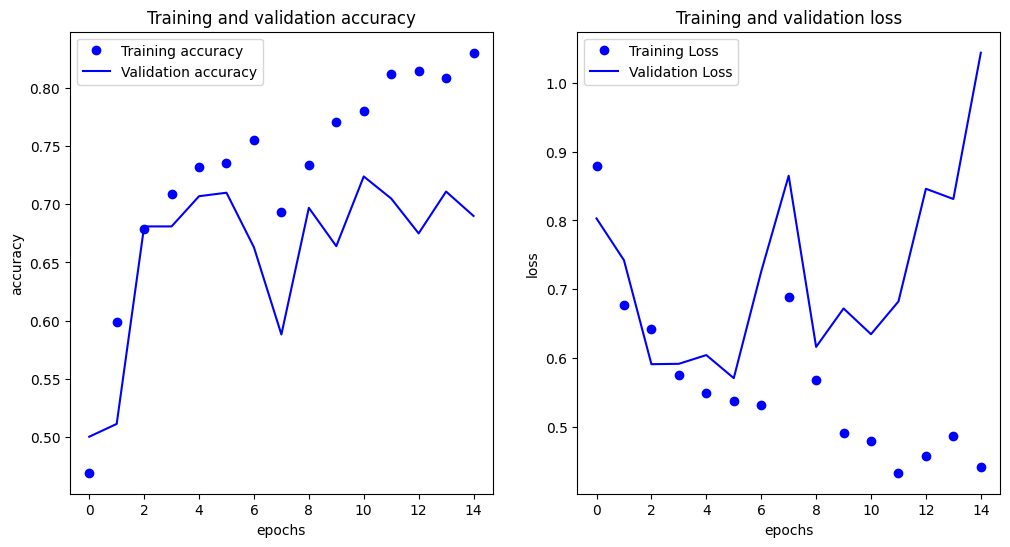

In [47]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)